## PRE-PROCESSING

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import json

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

from helpers.CK48Dataprocessing import loadDataset, TrainTestSplit
from models.EmotionModel import EMmodel

In [2]:
path = './CK+48'
images_f_2, images_f, labels_f, images, images_o, labels, Exp = loadDataset(path)
X_train, X_test, Y_train, Y_test= TrainTestSplit(images_f, labels_f, testSize=0.25)

Importing from surprise: 100%|██████████████████████████████████| 249/249 [00:00<00:00, 2800.08it/s]


### Dataset distribution

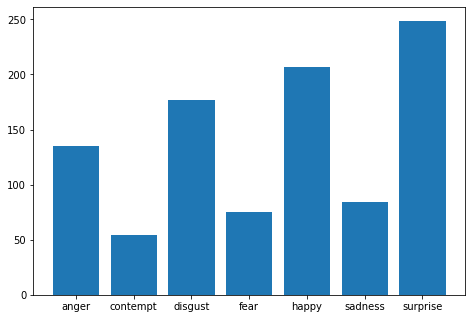

In [3]:
emotion_val, emotion_counts = np.unique(labels_f, return_counts=True)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Exp, emotion_counts)
plt.show()

## MODEL DEFINITION

In [107]:
Model=EMmodel(input_shape = (48,48,3))
Model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
dropout_10 (Dropout)         (None, 48, 48, 32)        0         
_________________________________________________________________
activation_8 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_11 (Dropout)         (None, 24, 24, 64)        0   

In [108]:
fle_s='./saved/Emotion_detection_180321.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=50, monitor='loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

## TRAINING MODEL

In [109]:
History=Model.fit(X_train,Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=500,callbacks=[callback_list])

Epoch 1/500
23/23 [==============================] - 8s 302ms/step - loss: 29.7738 - accuracy: 0.2060 - val_loss: 2.0802 - val_accuracy: 0.4553

Epoch 00001: loss improved from inf to 13.60413, saving model to ./saved\Emotion_detection_180321.h5
Epoch 2/500
23/23 [==============================] - 6s 276ms/step - loss: 1.9883 - accuracy: 0.3575 - val_loss: 1.9215 - val_accuracy: 0.4553

Epoch 00002: loss improved from 13.60413 to 1.95422, saving model to ./saved\Emotion_detection_180321.h5
Epoch 3/500
23/23 [==============================] - 6s 252ms/step - loss: 1.7758 - accuracy: 0.4554 - val_loss: 1.6754 - val_accuracy: 0.5081

Epoch 00003: loss improved from 1.95422 to 1.71187, saving model to ./saved\Emotion_detection_180321.h5
Epoch 4/500
23/23 [==============================] - 6s 259ms/step - loss: 1.4860 - accuracy: 0.5859 - val_loss: 1.4007 - val_accuracy: 0.6992

Epoch 00004: loss improved from 1.71187 to 1.45699, saving model to ./saved\Emotion_detection_180321.h5
Epoch 5/5

## SAVE MODEL AND DATA

In [110]:
# save path
save_dr = './saved/'

# Get the dictionary containing each metric and the loss for each epoch
history_dict = History.history
# Save it under the form of a json file
json.dump(history_dict, open(save_dr+'CK48_180321_history.json', 'w'))

## LOAD TRAINED MODEL

In [4]:
Model = tf.keras.models.load_model('./saved/Emotion_detection.h5')
print(Model.summary())

History = json.load(open('./saved/CK48_180321_history.json', 'r'))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0     

## EVALUATION

In [5]:
score = Model.evaluate(X_train, Y_train)

23/23 [==============================] - 1s 50ms/step - loss: 0.0385 - accuracy: 1.0000


In [6]:
score = Model.evaluate(X_test, Y_test)

8/8 [==============================] - 1s 84ms/step - loss: 0.0385 - accuracy: 1.0000


In [7]:
Pred=Model.predict(X_test)

In [8]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_o[ind])
    image_test=images_f_2[ind]
    print("Label actual:  " + Exp[labels[ind]]  )
    pred_1=Model.predict(np.array([image_test]))
    pred_class=Exp[int(np.argmax(pred_1))]
    print("Predicted Label: "+ pred_class)

In [ ]:
## test random images from the test sample

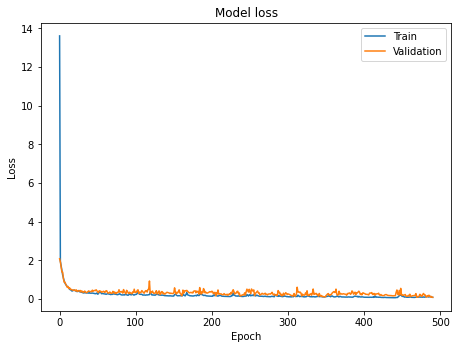

In [123]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25, wspace=0.35)

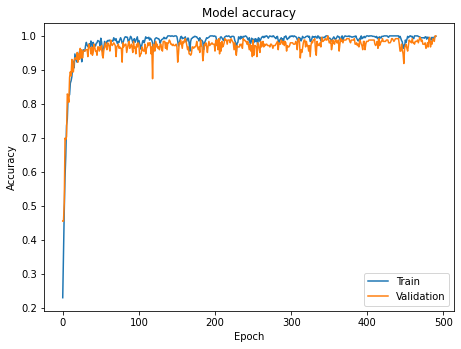

In [122]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25, wspace=0.35)

In [138]:
i=0
Y_test_l=[]
Pred_l=[]
while(i<len(Pred)):
  Y_test_l.append(int(np.argmax(Y_test[i])))
  Pred_l.append(int(np.argmax(Pred[i])))
  i+=1
report=classification_report(Y_test_l, Pred_l, target_names=Exp)
print(report)

              precision    recall  f1-score   support

       anger       0.53      1.00      0.69        34
    contempt       1.00      1.00      1.00        10
     disgust       0.77      0.67      0.72        49
        fear       1.00      0.89      0.94        19
       happy       0.95      0.79      0.86        47
     sadness       0.94      0.55      0.69        31
    surprise       1.00      0.98      0.99        56

    accuracy                           0.83       246
   macro avg       0.88      0.84      0.84       246
weighted avg       0.87      0.83      0.83       246



<AxesSubplot:>

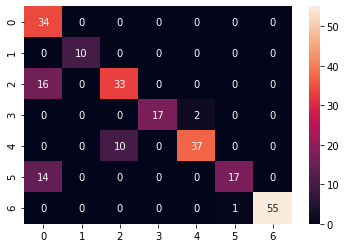

In [151]:
results = confusion_matrix(Y_test_l, Pred_l)
import seaborn as sns
sns.heatmap(results, annot=True)

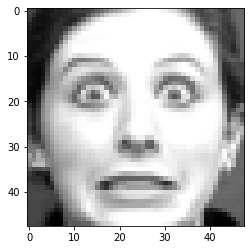

Predicted: fear
Actual: fear


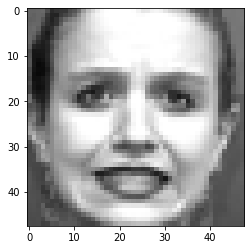

Predicted: fear
Actual: fear


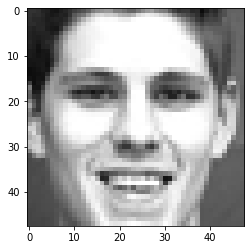

Predicted: happy
Actual: happy


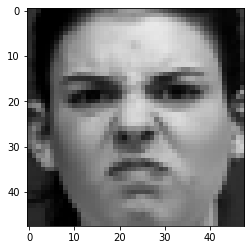

Predicted: disgust
Actual: disgust


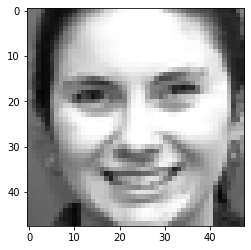

Predicted: happy
Actual: happy


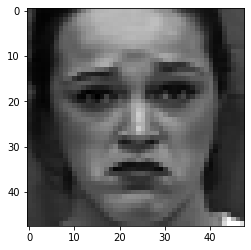

Predicted: sadness
Actual: sadness


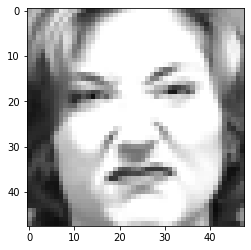

Predicted: disgust
Actual: disgust


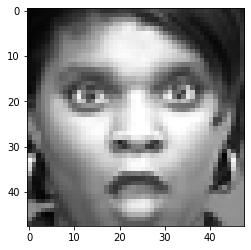

Predicted: surprise
Actual: surprise


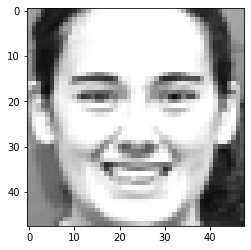

Predicted: happy
Actual: happy


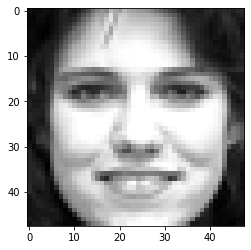

Predicted: happy
Actual: happy


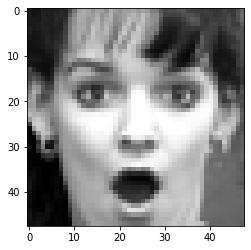

Predicted: surprise
Actual: surprise


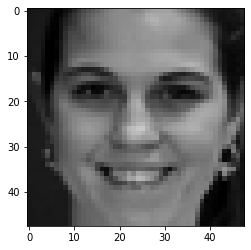

Predicted: happy
Actual: happy


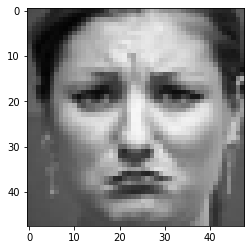

Predicted: sadness
Actual: sadness


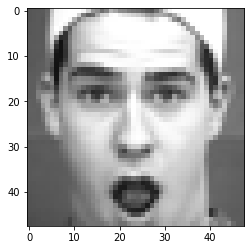

Predicted: surprise
Actual: surprise


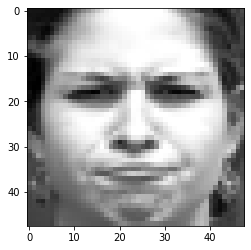

Predicted: anger
Actual: anger


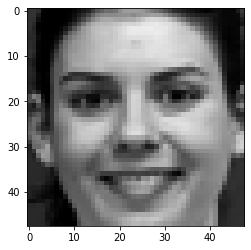

Predicted: happy
Actual: happy


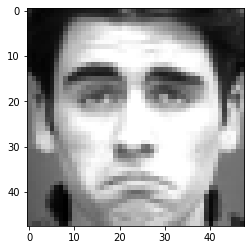

Predicted: sadness
Actual: sadness


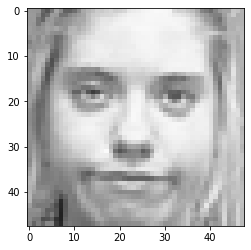

Predicted: contempt
Actual: contempt


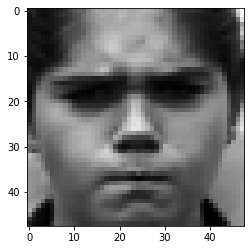

Predicted: anger
Actual: anger


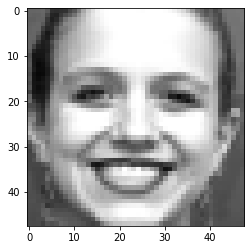

Predicted: happy
Actual: happy


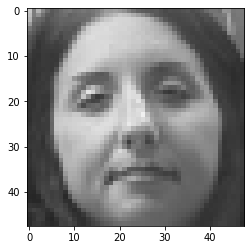

Predicted: contempt
Actual: contempt


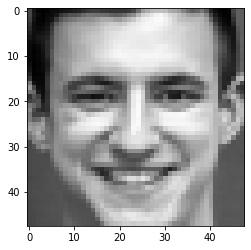

Predicted: happy
Actual: happy


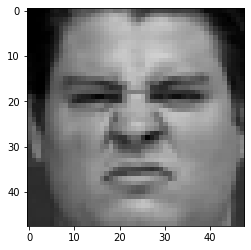

Predicted: disgust
Actual: disgust


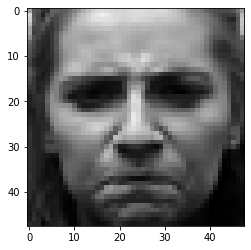

Predicted: anger
Actual: anger


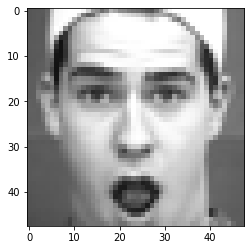

Predicted: surprise
Actual: surprise


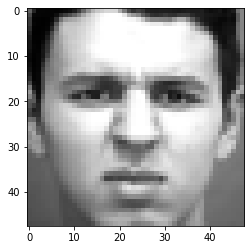

Predicted: disgust
Actual: disgust


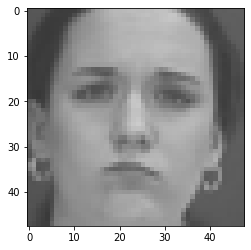

Predicted: sadness
Actual: sadness


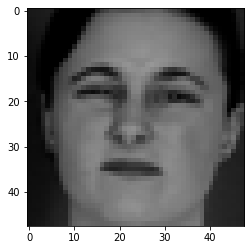

Predicted: disgust
Actual: disgust


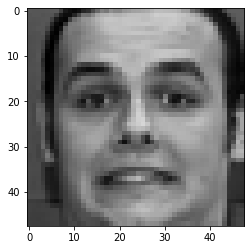

Predicted: fear
Actual: fear


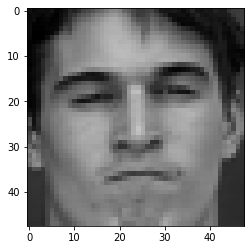

Predicted: anger
Actual: anger


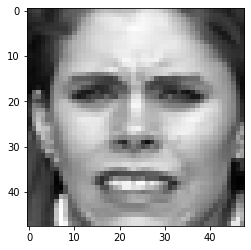

Predicted: fear
Actual: fear


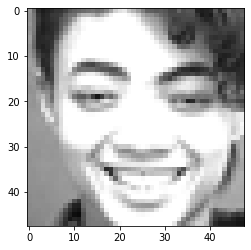

Predicted: happy
Actual: happy


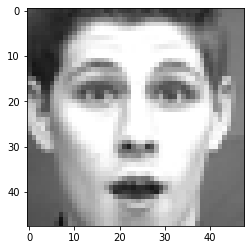

Predicted: surprise
Actual: surprise


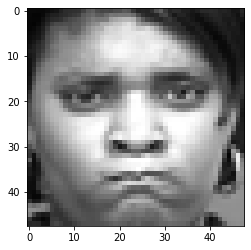

Predicted: anger
Actual: anger


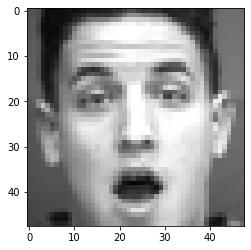

Predicted: surprise
Actual: surprise


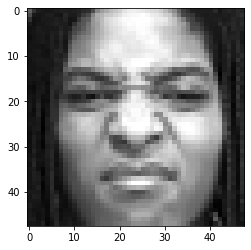

Predicted: disgust
Actual: disgust


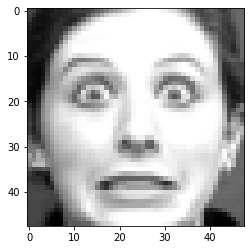

Predicted: fear
Actual: fear


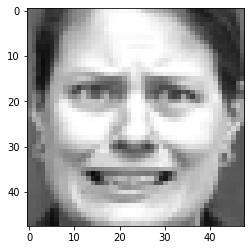

Predicted: fear
Actual: fear


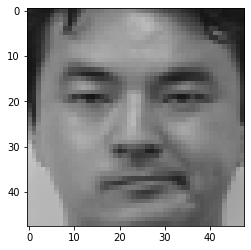

Predicted: contempt
Actual: contempt


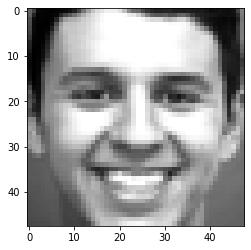

Predicted: happy
Actual: happy


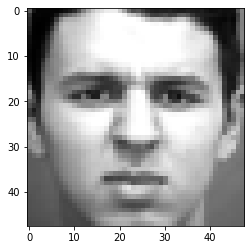

Predicted: disgust
Actual: disgust


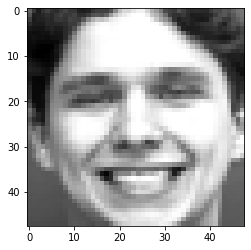

Predicted: happy
Actual: happy


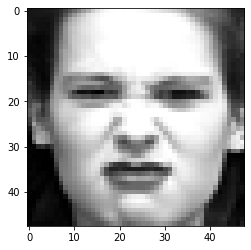

Predicted: disgust
Actual: disgust


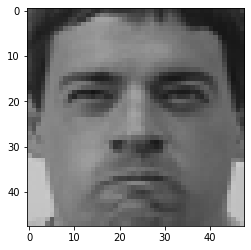

Predicted: anger
Actual: anger


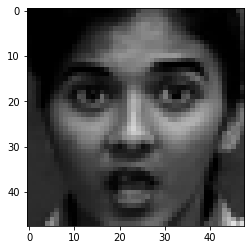

Predicted: surprise
Actual: surprise


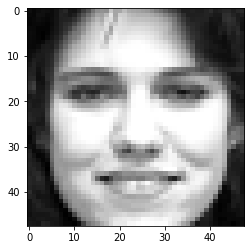

Predicted: happy
Actual: happy


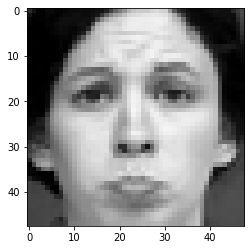

Predicted: sadness
Actual: sadness


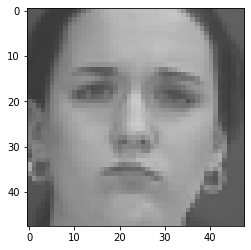

Predicted: sadness
Actual: sadness


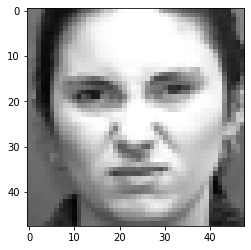

Predicted: disgust
Actual: disgust


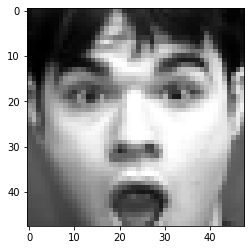

Predicted: surprise
Actual: surprise


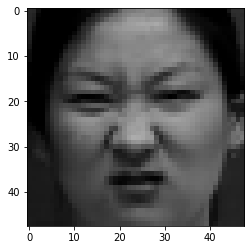

Predicted: disgust
Actual: disgust


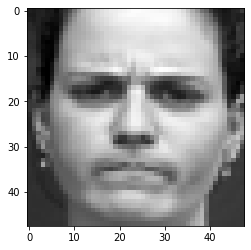

Predicted: anger
Actual: anger


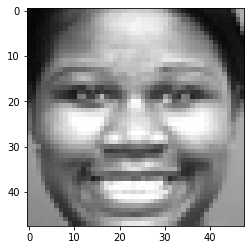

Predicted: happy
Actual: happy


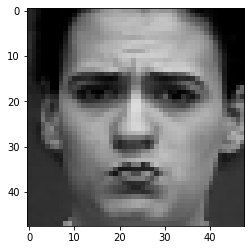

Predicted: sadness
Actual: sadness


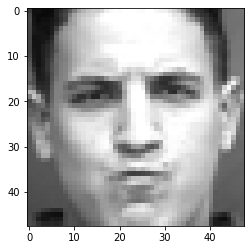

Predicted: anger
Actual: anger


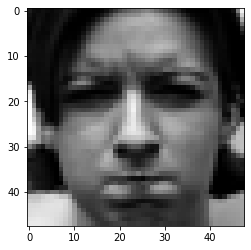

Predicted: anger
Actual: anger


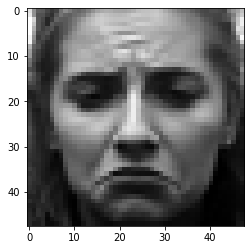

Predicted: sadness
Actual: sadness


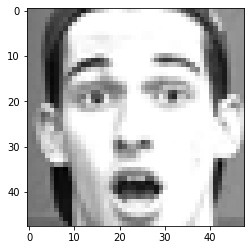

Predicted: surprise
Actual: surprise


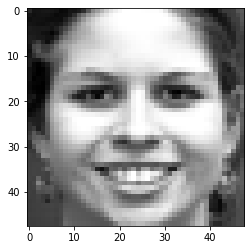

Predicted: happy
Actual: happy


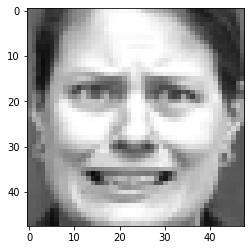

Predicted: fear
Actual: fear


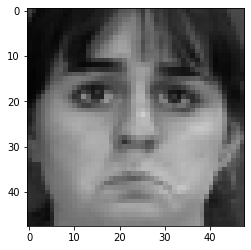

Predicted: sadness
Actual: sadness


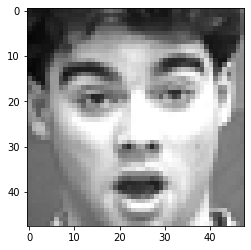

Predicted: surprise
Actual: surprise


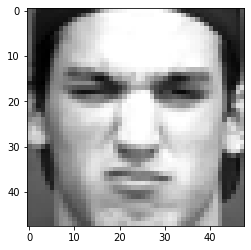

Predicted: disgust
Actual: disgust


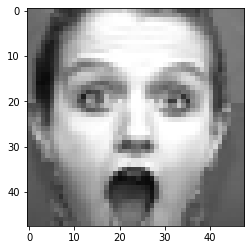

Predicted: surprise
Actual: surprise


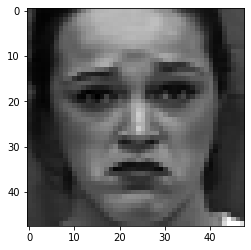

Predicted: sadness
Actual: sadness


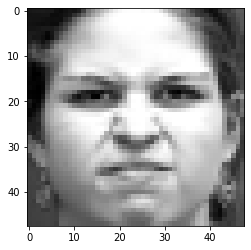

Predicted: disgust
Actual: disgust


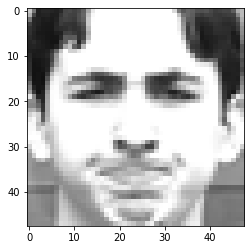

Predicted: anger
Actual: anger


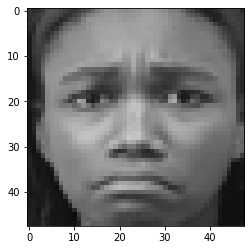

Predicted: sadness
Actual: sadness


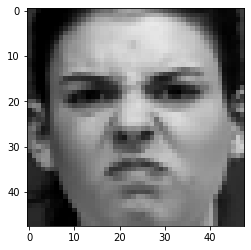

Predicted: disgust
Actual: disgust


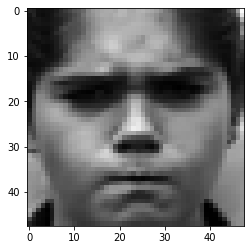

Predicted: anger
Actual: anger


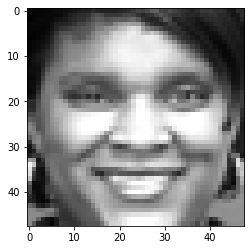

Predicted: happy
Actual: happy


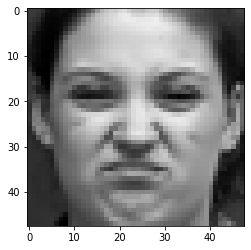

Predicted: disgust
Actual: disgust


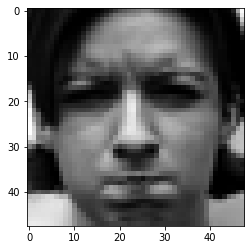

Predicted: anger
Actual: anger


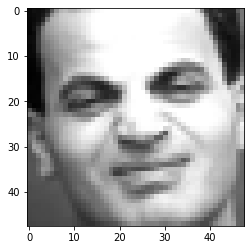

Predicted: disgust
Actual: disgust


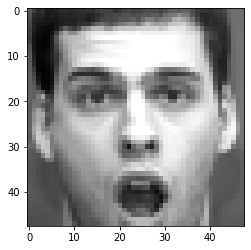

Predicted: surprise
Actual: surprise


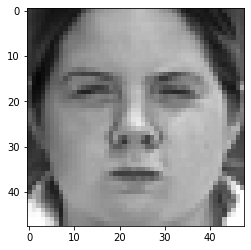

Predicted: anger
Actual: anger


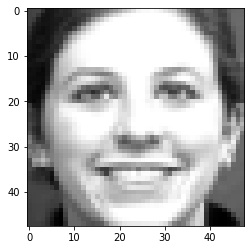

Predicted: happy
Actual: happy


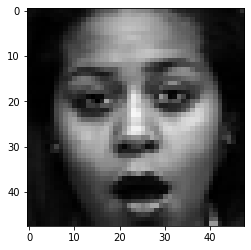

Predicted: surprise
Actual: surprise


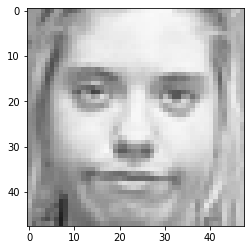

Predicted: contempt
Actual: contempt


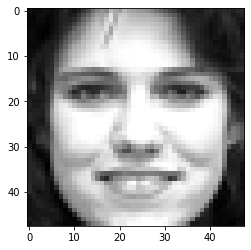

Predicted: happy
Actual: happy


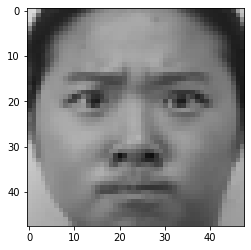

Predicted: anger
Actual: anger


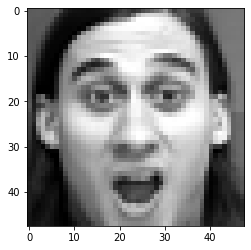

Predicted: surprise
Actual: surprise


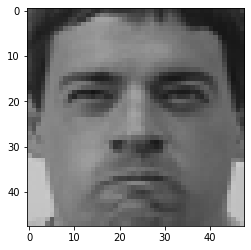

Predicted: anger
Actual: anger


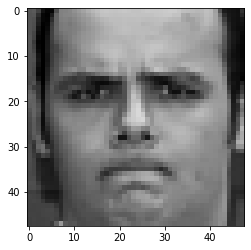

Predicted: anger
Actual: anger


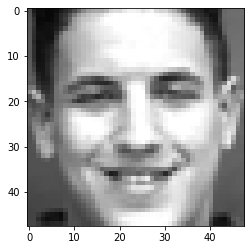

Predicted: happy
Actual: happy


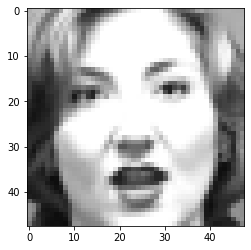

Predicted: surprise
Actual: surprise


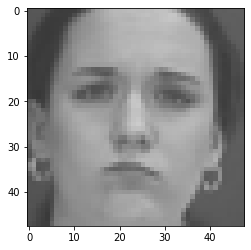

Predicted: sadness
Actual: sadness


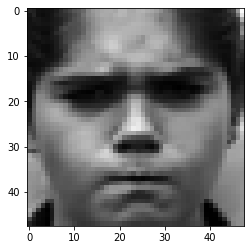

Predicted: anger
Actual: anger


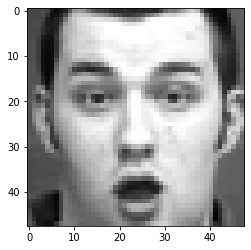

Predicted: surprise
Actual: surprise


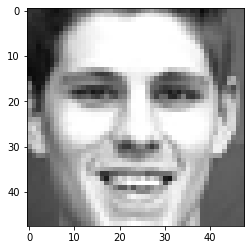

Predicted: happy
Actual: happy


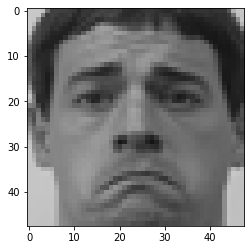

Predicted: sadness
Actual: sadness


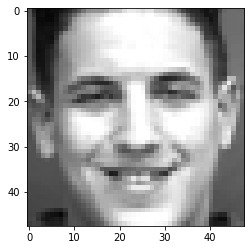

Predicted: happy
Actual: happy


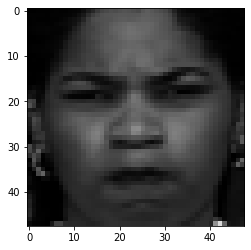

Predicted: anger
Actual: anger


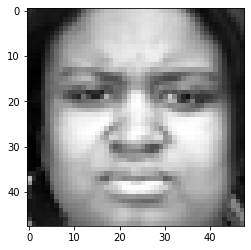

Predicted: disgust
Actual: disgust


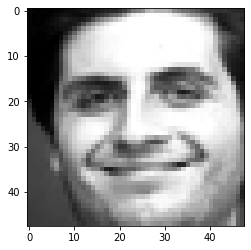

Predicted: happy
Actual: happy


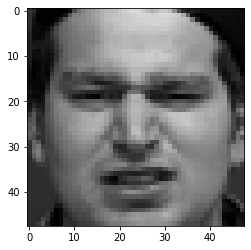

Predicted: disgust
Actual: disgust


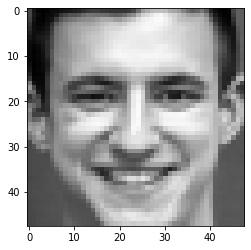

Predicted: happy
Actual: happy


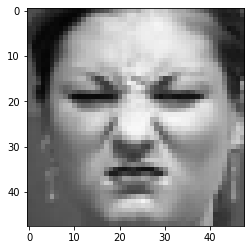

Predicted: disgust
Actual: disgust


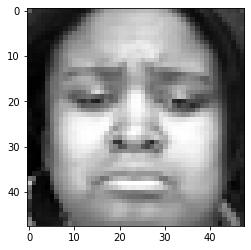

Predicted: sadness
Actual: sadness


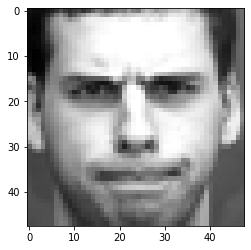

Predicted: anger
Actual: anger


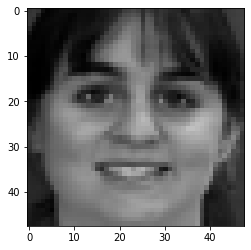

Predicted: happy
Actual: happy


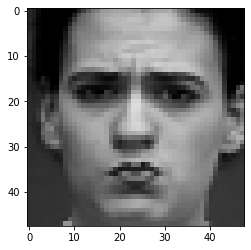

Predicted: sadness
Actual: sadness


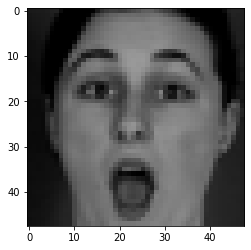

Predicted: surprise
Actual: surprise


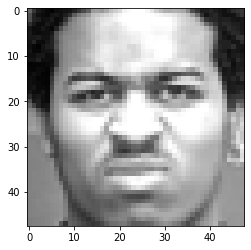

Predicted: disgust
Actual: disgust


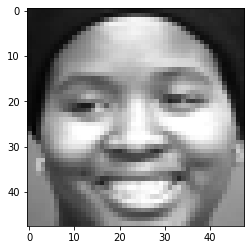

Predicted: happy
Actual: happy


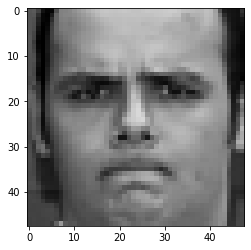

Predicted: anger
Actual: anger


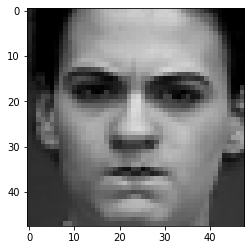

Predicted: anger
Actual: anger


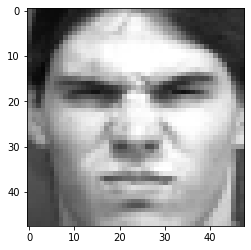

Predicted: disgust
Actual: disgust


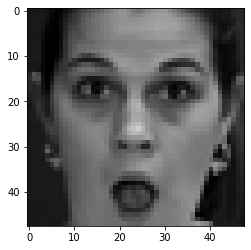

Predicted: surprise
Actual: surprise


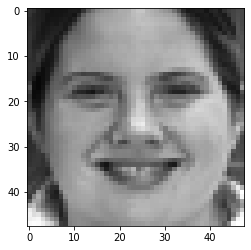

Predicted: happy
Actual: happy


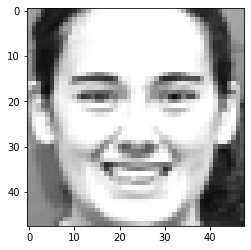

Predicted: happy
Actual: happy


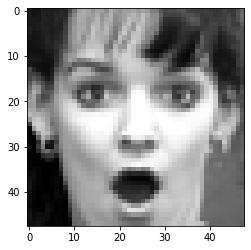

Predicted: surprise
Actual: surprise


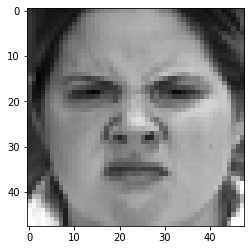

Predicted: disgust
Actual: disgust


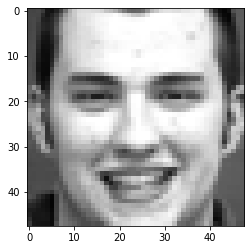

Predicted: happy
Actual: happy


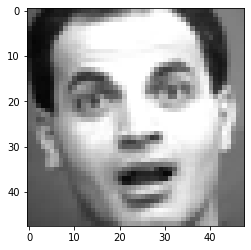

Predicted: surprise
Actual: surprise


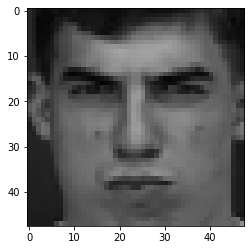

Predicted: anger
Actual: anger


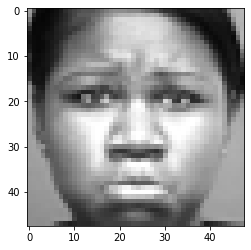

Predicted: sadness
Actual: sadness


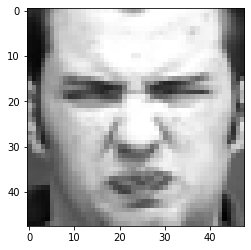

Predicted: disgust
Actual: disgust


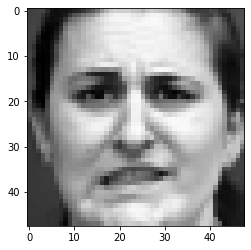

Predicted: fear
Actual: fear


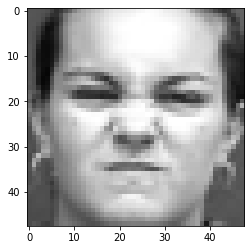

Predicted: disgust
Actual: disgust


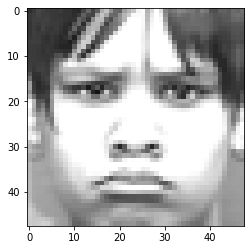

Predicted: sadness
Actual: sadness


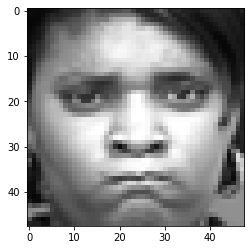

Predicted: anger
Actual: anger


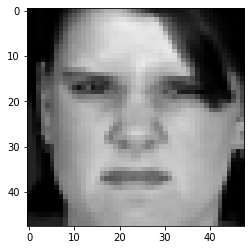

Predicted: disgust
Actual: disgust


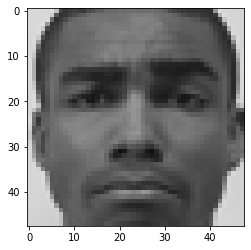

Predicted: sadness
Actual: sadness


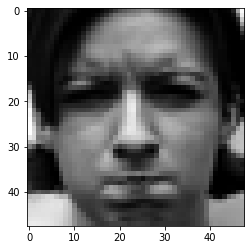

Predicted: anger
Actual: anger


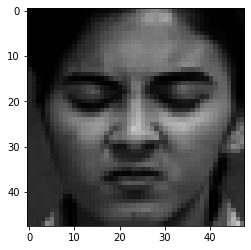

Predicted: disgust
Actual: disgust


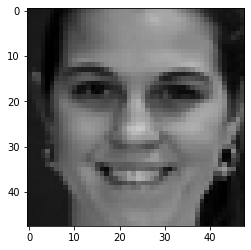

Predicted: happy
Actual: happy


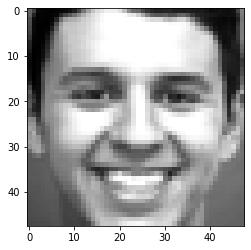

Predicted: happy
Actual: happy


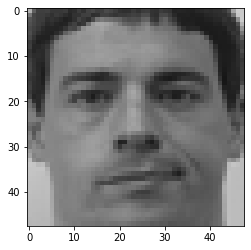

Predicted: contempt
Actual: contempt


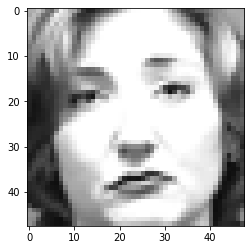

Predicted: sadness
Actual: sadness


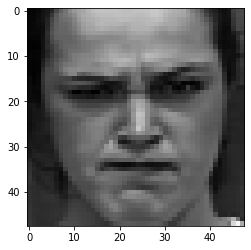

Predicted: anger
Actual: anger


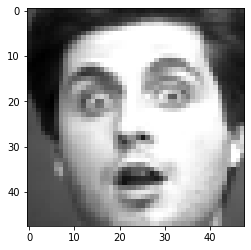

Predicted: surprise
Actual: surprise


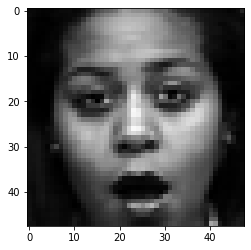

Predicted: surprise
Actual: surprise


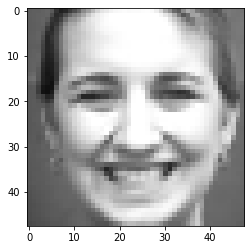

Predicted: happy
Actual: happy


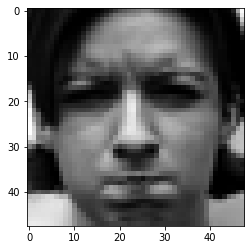

Predicted: anger
Actual: anger


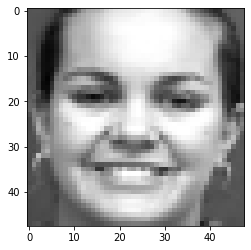

Predicted: happy
Actual: happy


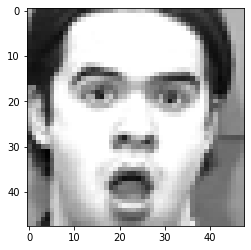

Predicted: surprise
Actual: surprise


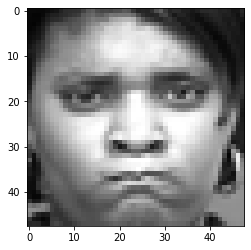

Predicted: anger
Actual: anger


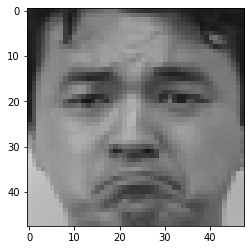

Predicted: sadness
Actual: sadness


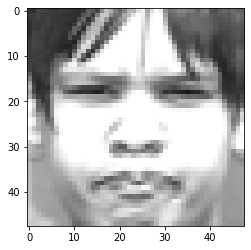

Predicted: anger
Actual: anger


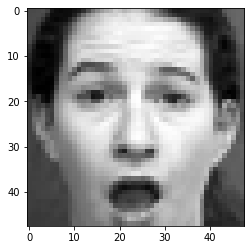

Predicted: surprise
Actual: surprise


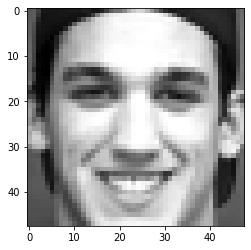

Predicted: happy
Actual: happy


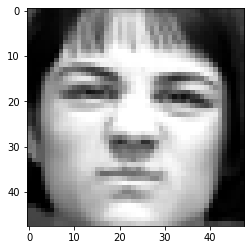

Predicted: disgust
Actual: disgust


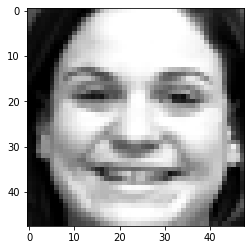

Predicted: happy
Actual: happy


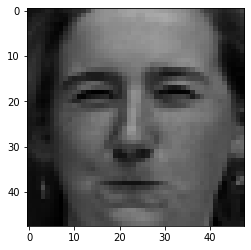

Predicted: anger
Actual: anger


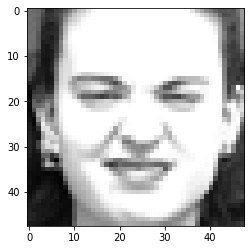

Predicted: disgust
Actual: disgust


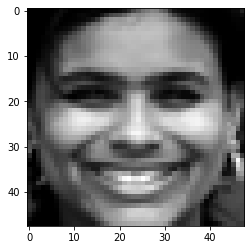

Predicted: happy
Actual: happy


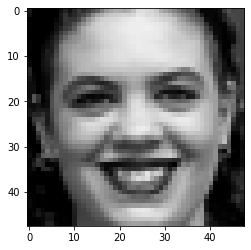

Predicted: happy
Actual: happy


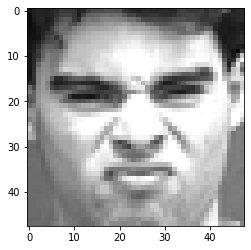

Predicted: disgust
Actual: disgust


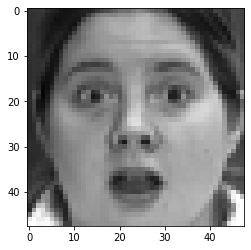

Predicted: surprise
Actual: surprise


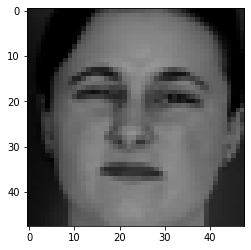

Predicted: disgust
Actual: disgust


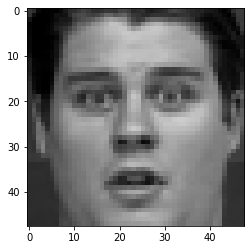

Predicted: surprise
Actual: surprise


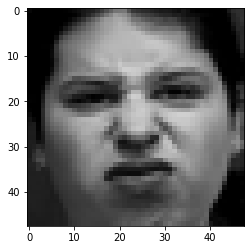

Predicted: disgust
Actual: disgust


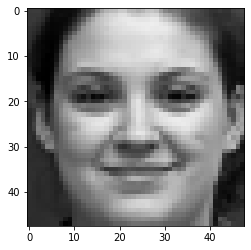

Predicted: happy
Actual: happy


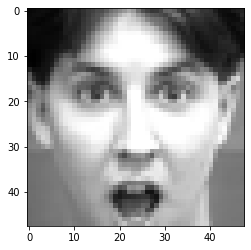

Predicted: surprise
Actual: surprise


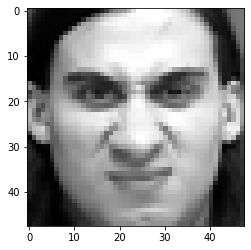

Predicted: disgust
Actual: disgust


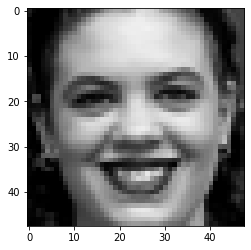

Predicted: happy
Actual: happy


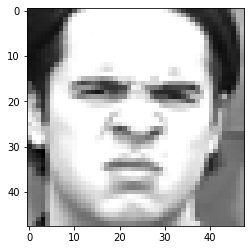

Predicted: disgust
Actual: disgust


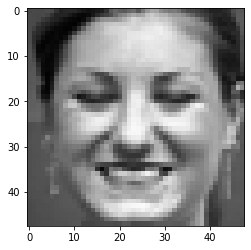

Predicted: happy
Actual: happy


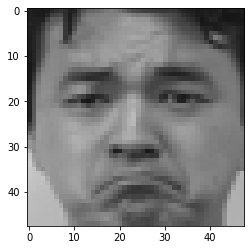

Predicted: sadness
Actual: sadness


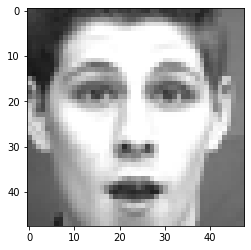

Predicted: surprise
Actual: surprise


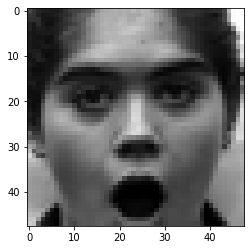

Predicted: surprise
Actual: surprise


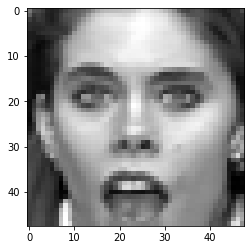

Predicted: surprise
Actual: surprise


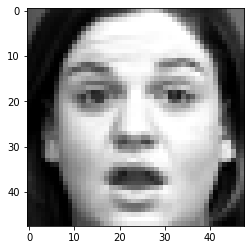

Predicted: surprise
Actual: surprise


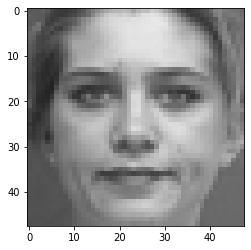

Predicted: contempt
Actual: contempt


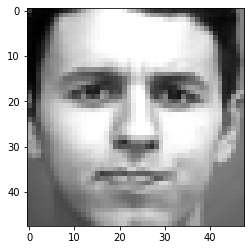

Predicted: anger
Actual: anger


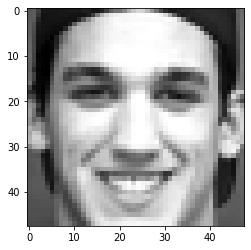

Predicted: happy
Actual: happy


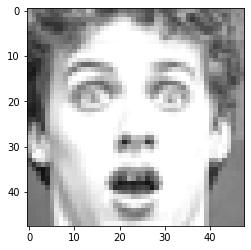

Predicted: surprise
Actual: surprise


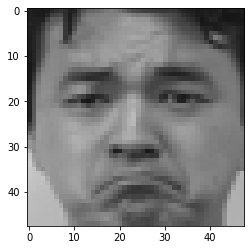

Predicted: sadness
Actual: sadness


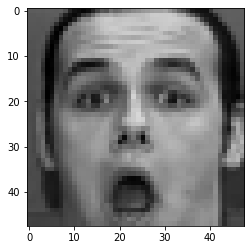

Predicted: surprise
Actual: surprise


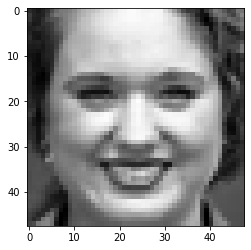

Predicted: happy
Actual: happy


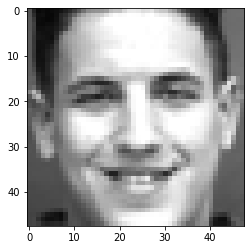

Predicted: happy
Actual: happy


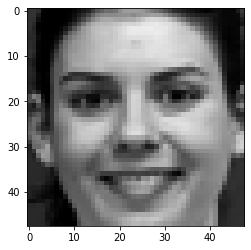

Predicted: happy
Actual: happy


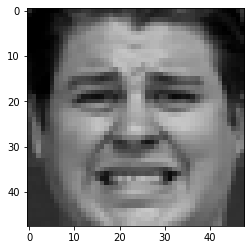

Predicted: fear
Actual: fear


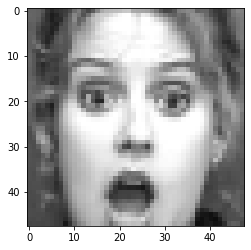

Predicted: surprise
Actual: surprise


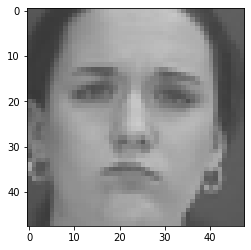

Predicted: sadness
Actual: sadness


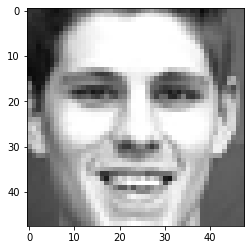

Predicted: happy
Actual: happy


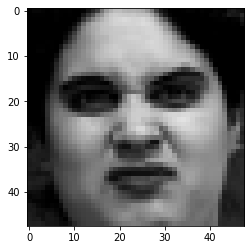

Predicted: disgust
Actual: disgust


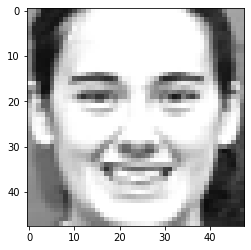

Predicted: happy
Actual: happy


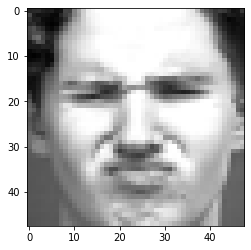

Predicted: disgust
Actual: disgust


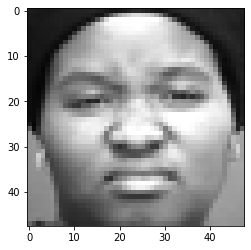

Predicted: disgust
Actual: disgust


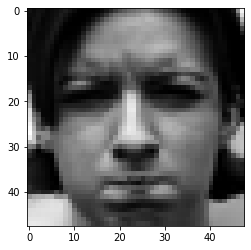

Predicted: anger
Actual: anger


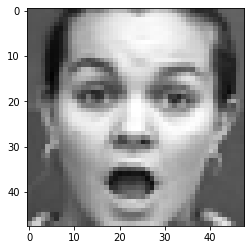

Predicted: surprise
Actual: surprise


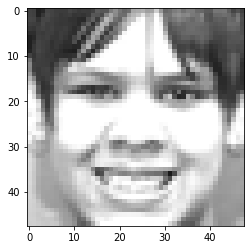

Predicted: happy
Actual: happy


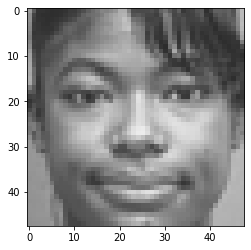

Predicted: contempt
Actual: contempt


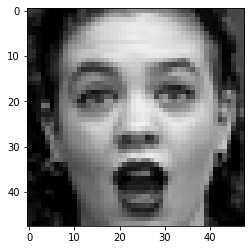

Predicted: surprise
Actual: surprise


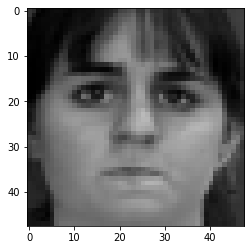

Predicted: anger
Actual: anger


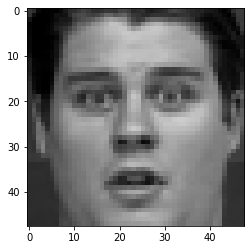

Predicted: surprise
Actual: surprise


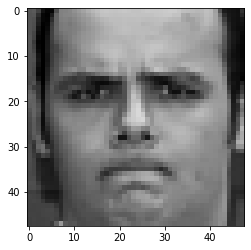

Predicted: anger
Actual: anger


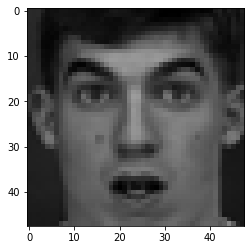

Predicted: surprise
Actual: surprise


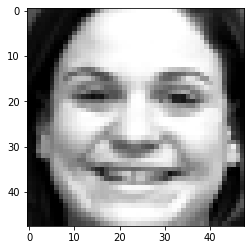

Predicted: happy
Actual: happy


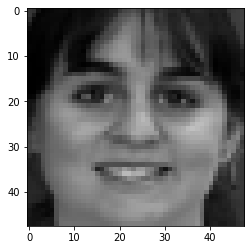

Predicted: happy
Actual: happy


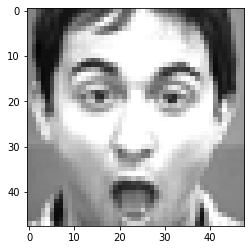

Predicted: surprise
Actual: surprise


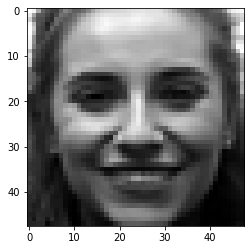

Predicted: happy
Actual: happy


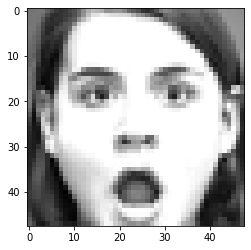

Predicted: surprise
Actual: surprise


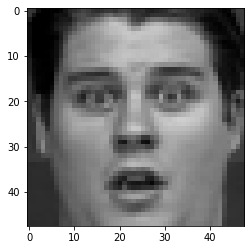

Predicted: surprise
Actual: surprise


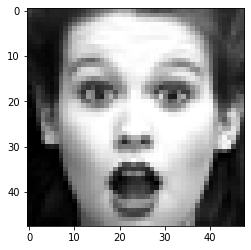

Predicted: surprise
Actual: surprise


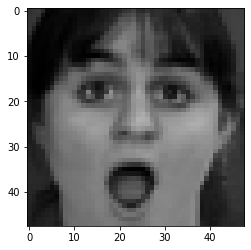

Predicted: surprise
Actual: surprise


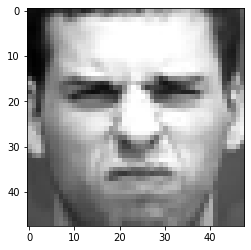

Predicted: disgust
Actual: disgust


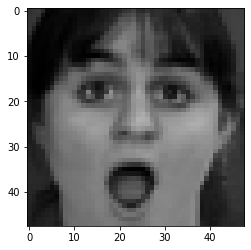

Predicted: surprise
Actual: surprise


<Figure size 432x288 with 0 Axes>

In [73]:
numTest = 200
results = []

for i in range(numTest):
    res = []
    
    randInt = int(np.random.uniform(0, len(images)))
    
    plt.imshow(images_o[randInt])
    plt.show()
    plt.clf()
    
    pred=Model.predict(np.array([images_f_2[randInt]]))
    pred_class=Exp[int(np.argmax(pred))]
    print("Predicted: "+ pred_class)
    print("Actual: "+ Exp[labels_f[randInt]])
    
    res.append(int(np.argmax(pred)))
    res.append(labels_f[randInt])
    res.append(randInt)
    results.append(res)
    
    

In [74]:
results = np.array(results)
pred_p = results[:,0]
act_p = results[:,1]
img_ind = results[:,2]

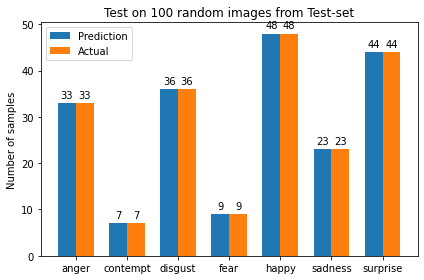

In [76]:
pred_p_val, pred_p_count = np.unique(pred_p, return_counts=True)
act_p_val, act_p_count = np.unique(act_p, return_counts=True)

x = np.arange(len(Exp))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, pred_p_count, width, label='Prediction')
rects2 = ax.bar(x + width/2, act_p_count, width, label='Actual')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of samples')
ax.set_title('Test on 100 random images from Test-set')
ax.set_xticks(x)
ax.set_xticklabels(Exp)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## TEST OWN PICTURES

In [102]:
def testown(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    plt.clf()
    
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    img = cv2.resize(img,(48,48))

    img=img/255
    pred=Model.predict(np.array([img]))
    pred_class=Exp[int(np.argmax(pred))]
    print("Predicted Label: "+ pred_class)

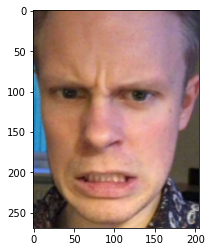

Predicted Label: disgust


<Figure size 432x288 with 0 Axes>

In [103]:
img = cv2.imread('./images/Oanger.png')
testown(img)

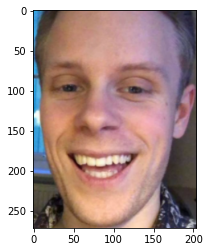

Predicted Label: contempt


<Figure size 432x288 with 0 Axes>

In [104]:
img = cv2.imread('./images/Ohappy.png')
testown(img)

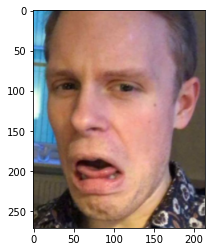

Predicted Label: contempt


<Figure size 432x288 with 0 Axes>

In [88]:
img = cv2.imread('./images/Odisgust.png')
testown(img)

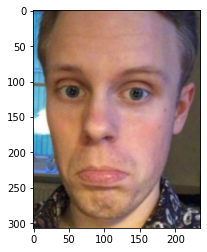

Predicted Label: contempt


<Figure size 432x288 with 0 Axes>

In [89]:
img = cv2.imread('./images/Osad.png')
testown(img)

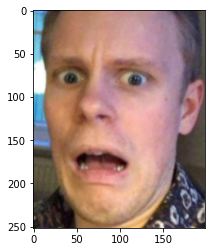

Predicted Label: contempt


<Figure size 432x288 with 0 Axes>

In [90]:
img = cv2.imread('./images/Ofear.png')
testown(img)